In [1]:
import scipy.special as sciSp
import numpy as np
import matplotlib.pyplot as plt


# 1) a) 

# f is Runge function, g is Runge-with-correction to put it in usuable form
f = lambda x: 1/(1+x**2)
g = lambda x: np.exp(x)/(1+x**2)

In [2]:
# select order of quadrature
n = 100
roots,weights,mu=sciSp.roots_laguerre(n,mu=True)

In [3]:
def Laguerre(n,func):
    roots,weights,mu=sciSp.roots_laguerre(n,mu=True)
    Ival = 0
    for i in range(len(roots)):
        Ival += weights[i]*func(roots[i])
    return Ival

# Test function of Gaussian distribution with e^x correction factor
ftest = lambda x: np.exp(-x**2/2+x)/np.sqrt(2*np.pi)

Itest = Laguerre(80,ftest)
print("I of e^(-x^2+x)/(2*pi)^1/2 from 0 -> infinity (n=100): " + str(Itest))

err = []
for i in range(1,186):
    err.append(abs(2*Laguerre(i,g)-np.pi))
print("error for I Runge function (n=6): " + str(err[5]))
print("error for I Runge function (n=11): " + str(err[10]))
print("error for I Runge function (n=51): " + str(err[50]))
print("error for I Runge function (n=101): " + str(err[100]))
print("error for I Runge function (n=185): " + str(err[184]))
err[::12]

I of e^(-x^2+x)/(2*pi)^1/2 from 0 -> infinity (n=100): 0.5000000000000008
error for I Runge function (n=6): 0.10380313749477255
error for I Runge function (n=11): 0.050597059405046885
error for I Runge function (n=51): 0.010280123858014356
error for I Runge function (n=101): 0.005108588204004061
error for I Runge function (n=185): 0.0027617962438073462


[0.423310825130748,
 0.04224494092632369,
 0.02149036017915984,
 0.014308940309912366,
 0.010711861670055889,
 0.008553794112730717,
 0.007116623284831647,
 0.006091379719667334,
 0.005323431706160342,
 0.0047268665027546675,
 0.004250155526280608,
 0.00386052753830457,
 0.0035361505068056687,
 0.0032619213237694566,
 0.0030270602928346158,
 0.00282366827533842]

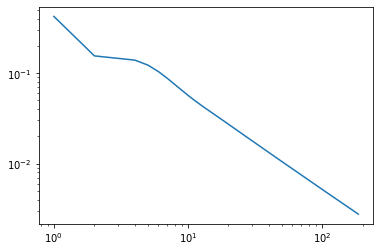

In [4]:
plt.loglog(np.linspace(1,186,185),err)

In [75]:
# 1) b) 

g1b = lambda t: 2*np.exp(2*t)/(np.exp(2*t)-2*np.exp(t)+2)
err = []
for i in range(1,95):
    err.append(abs(Laguerre(i,g1b)-np.pi))
err[80:]

[3.7028442978481735e-08,
 1.0887464263475977e-08,
 1.0309592290980163e-08,
 2.681583133323784e-08,
 3.900935663381233e-08,
 4.7349329790336014e-08,
 5.2339564238224057e-08,
 5.449886808506221e-08,
 5.4337801813630904e-08,
 5.234138278353839e-08,
 4.8956712905834365e-08,
 4.458492552927851e-08,
 3.9576806720731383e-08,
 3.4231225409797617e-08]

In [14]:
# 2) a) 
from scipy.linalg import hilbert
from scipy.integrate import quad
import scipy.integrate as integ

def quad1D(f,a,b):
    Q,errEst = quad(f,a,b,epsabs=1.5e-8,epsrel=1.5e-8,limit=50)
    return Q
def quad2D(f,a1,b1,a2,b2):
    def g(x):
        def fas2(y):
            return f(x,y)
        Q = quad1D(fas2,a2,b2)
        return Q
    Q = quad1D(g,a1,b1)
    return Q
def quad3D(f,a1,b1,a2,b2,a3,b3):
    def g1(x,y):
        def fas3(z):
            return f(x,y,z)
        Q = quad1D(fas3,a3,b3)
        return Q
    Q = quad2D(g1,a1,b1,a2,b2)
    return Q
def quad4D(f,a1,b1,a2,b2,a3,b3,a4,b4):
    def g2(x,y,z):
        def fas4(q):
            return f(x,y,z,q)
        Q = quad1D(fas4,a4,b4)
        return Q
    Q = quad3D(g2,a1,b1,a2,b2,a3,b3)
    return Q
def f2D(x,y):
    return x*y**2
def f3D(x,y,z):
    return x*y**2*z
def f4D(x,y,z,q):
    return x*y**2*z*q**2

a1, b1 = 2.1, 2.5
a2, b2 = 1.2, 1.4
a3, b3 = 1.5, 1.7
a4, b4 = 2, 2.4

print("Our est: " + str(quad2D(f2D,a1,b1,a2,b2)) + " vs integrate.dblquad: " + str(integ.dblquad(f2D,a2,b2,a1,b1)[0]))
print("Our est: " + str(quad3D(f3D,a1,b1,a2,b2,a3,b3)) + " vs integrate.tplquad: " + str(integ.tplquad(f3D,a1,b1,a2,b2,a3,b3)[0]))
print("Our est: " + str(quad4D(f4D,a1,b1,a2,b2,a3,b3,a4,b4)) + " vs integrate.nquad: " + str(integ.nquad(f4D,[[a1,b1],[a2,b2],[a3,b3],[a4,b4]])[0]))


Our est: 0.31157333333333304 vs integrate.dblquad: 0.31157333333333304
Our est: 0.09970346666666655 vs integrate.tplquad: 0.09970346666666655
Our est: 0.1935576632888887 vs integrate.nquad: 0.19355766328888868


In [73]:
# 2) b)

from time import process_time

t = process_time()
f2b4D = lambda x1,x2,x3,x4: np.matmul(np.matrix.transpose(np.array([x1,x2,x3,x4])),np.matmul(np.array(hilbert(4)),np.array([x1,x2,x3,x4])))
p4D = lambda x1,x2,x3,x4: (2*np.pi)**-2*np.exp(-0.5*(x1**2+x2**2+x3**2+x4**2))
fint = lambda x1,x2,x3,x4: f2b4D(x1,x2,x3,x4)*p4D(x1,x2,x3,x4)
fourD2b = quad4D(fint,-5,5,-5,5,-5,5,-5,5)
print("4D evaluates to: " + str(fourD2b))
print("time taken: " + str(process_time()-t))


4D evaluates to: 1.6761617121244665
time taken: 309.46875


In [32]:
t = process_time()
f2b3D = lambda x1,x2,x3: np.matmul(np.matrix.transpose(np.array([x1,x2,x3])),np.matmul(np.array(hilbert(3)),np.array([x1,x2,x3])))
p3D = lambda x1,x2,x3: (2*np.pi)**(-1.5)*np.exp(-0.5*(x1**2+x2**2+x3**2))
fint3 = lambda x1,x2,x3: f2b3D(x1,x2,x3)*p3D(x1,x2,x3)

print("3D evaluates to: " + str(quad3D(fint3,-5,5,-5,5,-5,5)))
print("time taken: " + str(process_time()-t))

3D evaluates to: 1.533307899800628
time taken: 6.828125


In [33]:
t = process_time()
f2b2D = lambda x1,x2: np.matmul(np.matrix.transpose(np.array([x1,x2])),np.matmul(np.array(hilbert(2)),np.array([x1,x2])))
p2D = lambda x1,x2: (2*np.pi)**(-1)*np.exp(-0.5*(x1**2+x2**2))
fint2 = lambda x1,x2: f2b2D(x1,x2)*p2D(x1,x2)

print("2D evaluates to: " + str(quad2D(fint2,-5,5,-5,5)))
print("time taken: " + str(process_time()-t))

2D evaluates to: 1.3333119816098895
time taken: 0.15625


In [34]:
t = process_time()
f2b1D = lambda x1: np.matmul(np.matrix.transpose(np.array([x1])),np.matmul(np.array(hilbert(1)),np.array([x1])))
p1D = lambda x1: (2*np.pi)**(-.5)*np.exp(-0.5*(x1**2))
fint1 = lambda x1: f2b1D(x1)*p1D(x1)

print("1D evaluates to: " + str(quad1D(fint1,-5,5)))
print("time taken: " + str(process_time()-t))

1D evaluates to: 0.999984559501709
time taken: 0.015625


In [71]:
# 2) c) 

def monteCarlo(dim, n):
    tot = 0;
    vals = [0]*n
    dist = np.random.randn(dim,n)
    A = hilbert(dim)
    for i in range(n):
        x = [0]*dim
        for j in range(dim):
            x[j]=(dist[j][i])
        f = np.matmul(np.array(x).T,np.matmul(np.array(A),np.array(x)))
        vals[i] = f
    return np.mean(vals)



In [74]:
print("Monty Carlo for d=1: " + str(monteCarlo(1,10**6)))
print("Monty Carlo for d=2: " + str(monteCarlo(2,10**6)))
print("Monty Carlo for d=3: " + str(monteCarlo(3,10**6)))
t = process_time()
mC4 = monteCarlo(4,10**6)
print("Monty Carlo for d=4: " + str(mC4))
print("Time for d=4: " + str(process_time()-t) + " and error: " + str(abs(mC4-fourD2b)))
t = process_time()
mC12 = monteCarlo(12,10**6)
print("Monty Carlo for d=12: " + str(mC12))
print("Time for d=12: " + str(process_time()-t) + " and error: " + str(abs(mC12-2.224352838648)))
t = process_time()
mC100 = monteCarlo(100,10**6)
print("Monty Carlo for d=100: " + str(mC100))
print("Time for d=100: " + str(process_time()-t) + " and error: " + str(abs(mC100-3.284342189302)))

Monty Carlo for d=1: 1.0016172126918845
Monty Carlo for d=2: 1.3347487782402558
Monty Carlo for d=3: 1.5330974098898897
Monty Carlo for d=4: 1.6750642950440995
Time for d=4: 9.046875 and error: 0.0010974170803670358
Monty Carlo for d=12: 2.2230747617375624
Time for d=12: 13.421875 and error: 0.0012780769104376866
Monty Carlo for d=100: 3.2848628110947344
Time for d=100: 71.0 and error: 0.000520621792734488
